<a href="https://colab.research.google.com/github/SarthoPramanik1075/Machine-Learning-/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [ ]:
df = pd.read_csv("heart_disease.csv") #https://www.kaggle.com/datasets/nprottay/heart-disease-info?select=heart_disease.csv
df.head(10)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
5,25.0,Male,152.0,257.0,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,No
6,78.0,Female,121.0,175.0,High,Yes,Yes,Yes,18.042332,No,...,No,Medium,Medium,9.240911,Medium,107.0,85.0,11.582983,19.659461,No
7,38.0,Female,161.0,187.0,Low,Yes,Yes,Yes,34.736683,No,...,No,Low,Medium,7.841008,High,228.0,111.0,4.929381,17.146599,No
8,56.0,Female,135.0,291.0,Low,No,Yes,Yes,34.493112,Yes,...,Yes,High,Low,6.941403,High,317.0,103.0,5.119015,6.051129,No
9,75.0,Male,144.0,252.0,Low,Yes,Yes,No,30.142149,No,...,Yes,Low,Medium,4.002662,High,199.0,96.0,10.005698,7.604357,No


In [ ]:
df.sample(10)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
1501,79.0,Male,144.0,206.0,Low,Yes,Yes,Yes,29.289872,Yes,...,No,NaN,Medium,5.014625,Low,229.0,142.0,13.936820,8.168100,No
8368,64.0,Male,141.0,240.0,Medium,No,Yes,Yes,26.684816,Yes,...,Yes,Medium,High,5.826012,Medium,235.0,118.0,5.431287,7.008613,Yes
9441,72.0,Male,168.0,170.0,High,Yes,No,Yes,22.501649,No,...,No,Low,High,5.444326,Low,307.0,95.0,4.335991,15.979218,Yes
7139,30.0,Male,147.0,227.0,Medium,Yes,No,Yes,38.111405,No,...,Yes,Medium,Medium,6.650133,Low,341.0,119.0,6.729935,14.348605,No
9637,70.0,Female,180.0,246.0,Low,No,No,Yes,35.097258,Yes,...,No,High,High,8.551482,High,115.0,85.0,11.746972,11.605240,Yes
5311,18.0,Female,171.0,227.0,High,Yes,Yes,No,25.715755,No,...,No,High,Medium,6.427421,High,194.0,138.0,2.238607,6.240182,No
4201,21.0,Female,158.0,183.0,Low,No,Yes,Yes,20.388600,Yes,...,No,Medium,Medium,5.831593,High,364.0,122.0,5.577152,8.984918,No
5536,53.0,Male,142.0,275.0,High,No,Yes,Yes,32.111223,No,...,No,Low,High,5.083517,Low,333.0,115.0,8.243884,13.794348,No
3091,36.0,Female,139.0,184.0,High,No,Yes,Yes,19.876748,No,...,Yes,Medium,Medium,6.977258,Medium,135.0,92.0,7.660662,10.250110,No
7438,39.0,Female,167.0,188.0,Low,Yes,No,Yes,38.723218,Yes,...,Yes,Low,High,4.500968,High,396.0,144.0,4.330870,17.360805,No


In [ ]:
print("Shape: ", df.shape)

Shape:  (10000, 21)


In [ ]:
print("Info: ",(df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [ ]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,9971.0,49.30,18.19,18.0,34.00,49.00,65.00,80.0
Blood Pressure,9981.0,149.76,17.57,120.0,134.00,150.00,165.00,180.0
Cholesterol Level,9970.0,225.43,43.58,150.0,187.00,226.00,263.00,300.0
BMI,9978.0,29.08,6.31,18.0,23.66,29.08,34.52,40.0
Sleep Hours,9975.0,6.99,1.75,4.0,5.45,7.00,8.53,10.0
Triglyceride Level,9974.0,250.73,87.07,100.0,176.00,250.00,326.00,400.0
Fasting Blood Sugar,9978.0,120.14,23.58,80.0,99.00,120.00,141.00,160.0
CRP Level,9974.0,7.47,4.34,0.0,3.67,7.47,11.26,15.0
Homocysteine Level,9980.0,12.46,4.32,5.0,8.72,12.41,16.14,20.0


In [ ]:
df.isna().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [ ]:
#!pip install ydata-profiling

In [ ]:
# from ydata_profiling import ProfileReport
# profile=ProfileReport(df, title="Data Profiling Report", explorative=True)
# profile.to_file("report.html")


In [ ]:
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(exclude="number").columns
target_cols = 'Heart Disease Status'

print("Numerical cols: ", num_cols)
print("Categorical cols: ", cat_cols)
print("Target cols: ", target_cols)

Numerical cols:  Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'],
      dtype='object')
Categorical cols:  Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption', 'Heart Disease Status'],
      dtype='object')
Target cols:  Heart Disease Status


In [ ]:
for c in cat_cols:
  print((c), df[c].unique())

Gender ['Male' 'Female' nan]
Exercise Habits ['High' 'Low' 'Medium' nan]
Smoking ['Yes' 'No' nan]
Family Heart Disease ['Yes' 'No' nan]
Diabetes ['No' 'Yes' nan]
High Blood Pressure ['Yes' 'No' nan]
Low HDL Cholesterol ['Yes' 'No' nan]
High LDL Cholesterol ['No' 'Yes' nan]
Alcohol Consumption ['High' 'Medium' 'Low' nan]
Stress Level ['Medium' 'High' 'Low' nan]
Sugar Consumption ['Medium' 'Low' 'High' nan]
Heart Disease Status ['No' 'Yes']


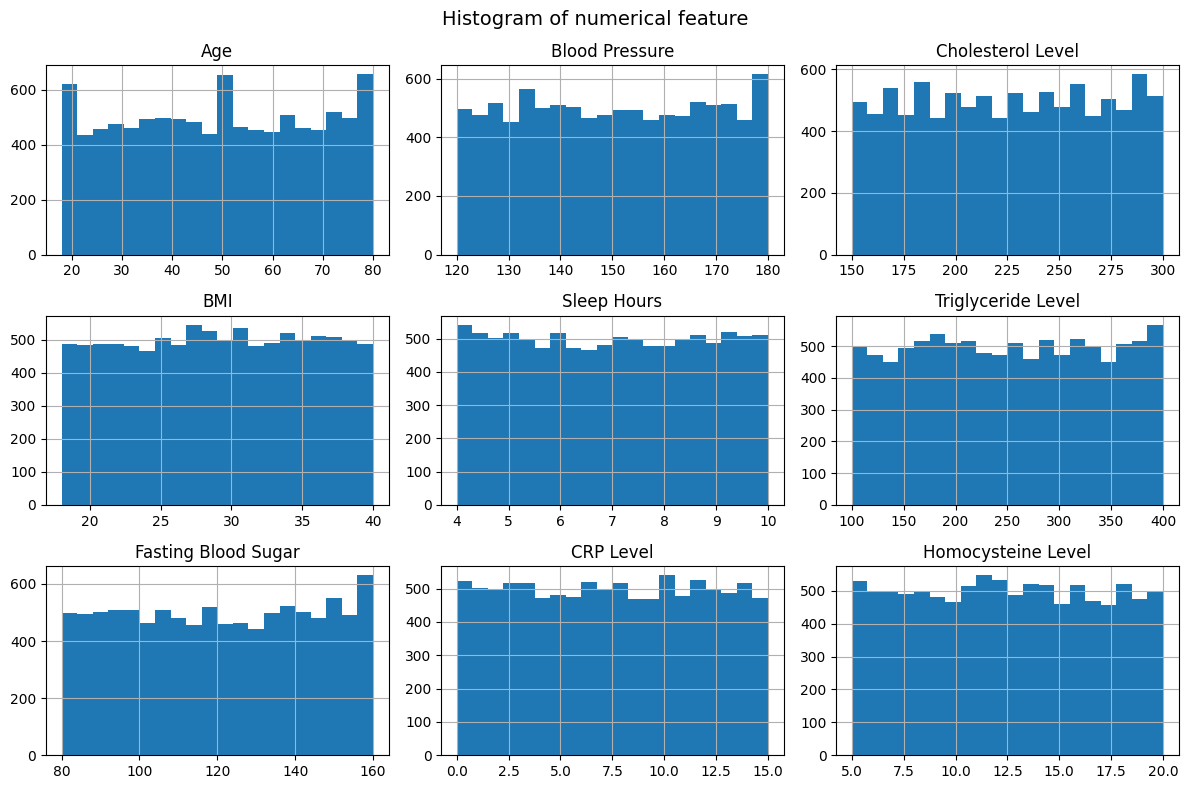

In [ ]:
df[num_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Histogram of numerical feature", fontsize=14)
plt.tight_layout()

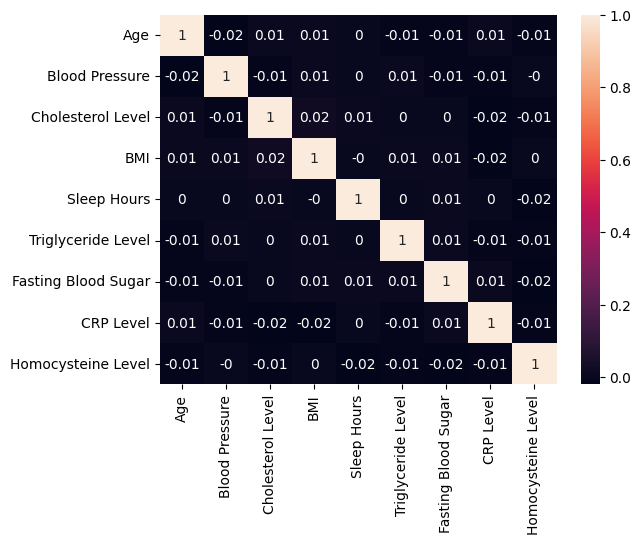

In [ ]:
sns.heatmap(df[num_cols].corr().round(2), annot=True)
plt.show()


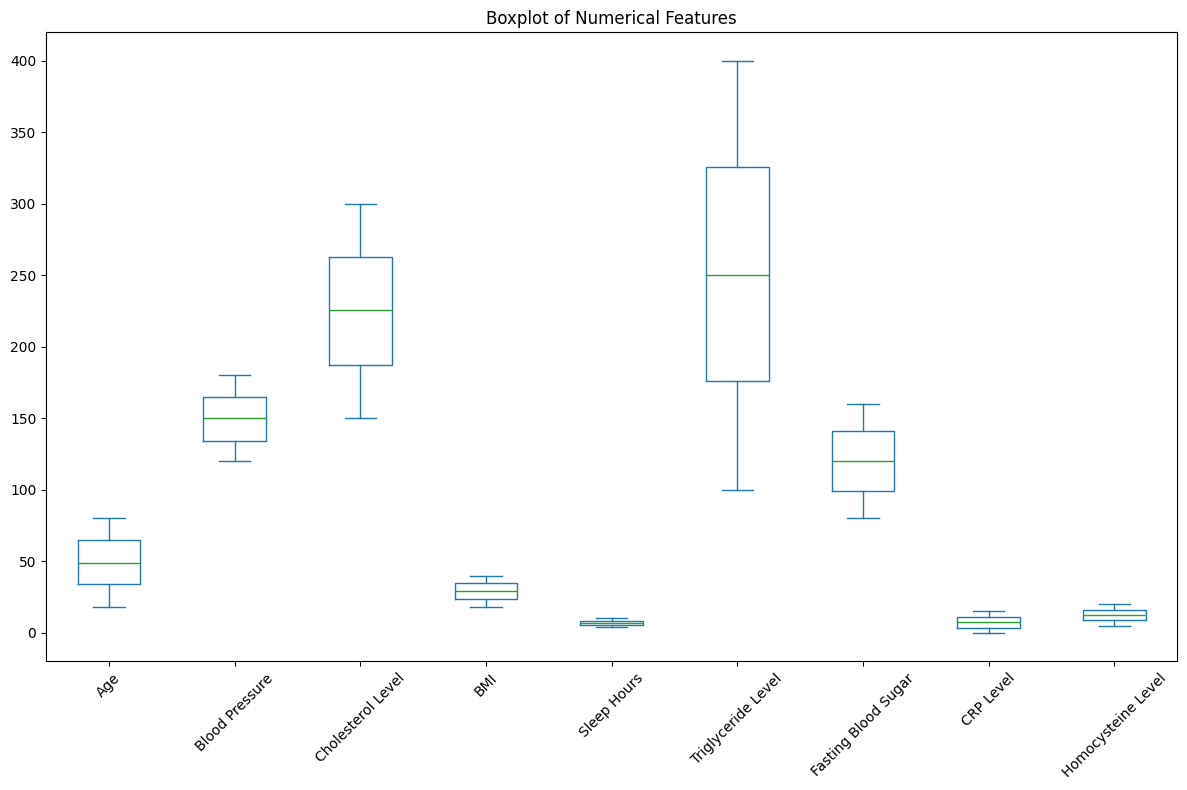

In [ ]:
df[num_cols].plot(kind="box", figsize=(12,8))
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# mising value handling

In [ ]:
df.drop(columns=['Alcohol Consumption'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Stress Level          9978 non-null   object 
 13  Sleep Hours           9975 non-null   float64
 14  Sugar Consumption     9970 non-null   object 
 15  Triglyceride Level  

In [ ]:
df[num_cols].skew()


,0
Age,-0.006789
Blood Pressure,0.013907
Cholesterol Level,-0.007120
BMI,-0.021342
Sleep Hours,0.000172
Triglyceride Level,0.006142
Fasting Blood Sugar,-0.008915
CRP Level,-0.004069
Homocysteine Level,0.007886


In [ ]:
df.isna().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5003
Female,4978


# ml pipeline

In [ ]:
X = df.drop(columns=['Heart Disease Status'])
Y = df['Heart Disease Status']

In [ ]:
num_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(exclude="number").columns
target_cols = 'Heart Disease Status'

print("Numerical cols: ", num_cols)
print("Categorical cols: ", cat_cols)
print("Target cols: ", target_cols)

Numerical cols:  Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'],
      dtype='object')
Categorical cols:  Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Stress Level', 'Sugar Consumption'],
      dtype='object')
Target cols:  Heart Disease Status


In [ ]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',drop='first'))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)
])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
Y.value_counts()

,count
Heart Disease Status,
No,8000
Yes,2000


In [ ]:
y_test.value_counts()

,count
Heart Disease Status,
No,1613
Yes,387


# model training

In [ ]:
lr = LogisticRegression(class_weight='balanced', random_state=42)
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier()

In [ ]:
models_to_run = {
    "logistic_regression": lr,
    "decision_tree": dt,
    "random_forest": rf,
    "knn": knn,
    "gradient_boosting": gb
}

# Before Sampling

In [ ]:
res = []

for name,model in models_to_run.items():
  pipe = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('model', model)
  ])
  # train
  pipe.fit(x_train,y_train)

  # predict
  y_pred = pipe.predict(x_test)

  # evaulation
  res.append({
      'model': name,
      'accuracy': accuracy_score(y_test, y_pred),
      'precision': precision_score(y_test, y_pred, pos_label='Yes'),
      'recall': recall_score(y_test, y_pred, pos_label='Yes'),
      'f1': f1_score(y_test, y_pred, pos_label='Yes'),
      'confusion_matrix': confusion_matrix(y_test, y_pred)
  })

result = pd.DataFrame(res).sort_values(by='recall',ascending=False)
result

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,model,accuracy,precision,recall,f1,confusion_matrix
0,logistic_regression,0.4985,0.178497,0.441860,0.254275,"[[826, 787], [216, 171]]"
1,decision_tree,0.6905,0.211443,0.219638,0.215463,"[[1296, 317], [302, 85]]"
3,knn,0.7595,0.126984,0.041344,0.062378,"[[1503, 110], [371, 16]]"
2,random_forest,0.8065,0.000000,0.000000,0.000000,"[[1613, 0], [387, 0]]"
4,gradient_boosting,0.8060,0.000000,0.000000,0.000000,"[[1612, 1], [387, 0]]"


# Over sampling(smote)

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

res = []

for name,model in models_to_run.items():
  pipe = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('smote',SMOTE(random_state=42)),
      ('model', model)
  ])
  # train
  pipe.fit(x_train,y_train)

  # predict
  y_pred = pipe.predict(x_test)

  # evaulation
  res.append({
      'model': name,
      'accuracy': accuracy_score(y_test, y_pred),
      'precision': precision_score(y_test, y_pred, pos_label='Yes'),
      'recall': recall_score(y_test, y_pred, pos_label='Yes'),
      'f1': f1_score(y_test, y_pred, pos_label='Yes'),
      'confusion_matrix': confusion_matrix(y_test, y_pred)
  })

result = pd.DataFrame(res).sort_values(by='recall',ascending=False)
result

,model,accuracy,precision,recall,f1,confusion_matrix
3,knn,0.4685,0.192168,0.545220,0.284175,"[[726, 887], [176, 211]]"
0,logistic_regression,0.4950,0.175182,0.434109,0.249629,"[[822, 791], [219, 168]]"
1,decision_tree,0.6720,0.196388,0.224806,0.209639,"[[1257, 356], [300, 87]]"
2,random_forest,0.8055,0.250000,0.002584,0.005115,"[[1610, 3], [386, 1]]"
4,gradient_boosting,0.8060,0.000000,0.000000,0.000000,"[[1612, 1], [387, 0]]"


#Under sampling

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

res = []

for name, model in models_to_run.items():

    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('under', RandomUnderSampler(random_state=42)),
        ('model', model)
    ])

    # train
    pipe.fit(x_train, y_train)

    # predict
    y_pred = pipe.predict(x_test)

    # evaluation
    res.append({
        'model': name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, pos_label='Yes'),
        'recall': recall_score(y_test, y_pred, pos_label='Yes'),
        'f1': f1_score(y_test, y_pred, pos_label='Yes'),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    })

result_under = pd.DataFrame(res).sort_values(by='recall', ascending=False)
result_under

,model,accuracy,precision,recall,f1,confusion_matrix
1,decision_tree,0.5175,0.205703,0.521964,0.295106,"[[833, 780], [185, 202]]"
4,gradient_boosting,0.4780,0.189802,0.519380,0.278008,"[[755, 858], [186, 201]]"
0,logistic_regression,0.4825,0.186047,0.496124,0.270613,"[[773, 840], [195, 192]]"
3,knn,0.4895,0.179798,0.459948,0.258533,"[[801, 812], [209, 178]]"
2,random_forest,0.5080,0.186120,0.457364,0.264574,"[[839, 774], [210, 177]]"
